# ISEL - CPS 
## Semestre 2022/23
# <br>
###  <center> 2º Trabalho Prático (Parte-B) </center>
# </br>


Trabalho realizado por:
* Roman Ishchuk, numero <b> 43498 </b>
* Diogo Santos, numero <b> 48626 </b>
* Pedro Silva, numero <b> 48965 </b>



In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio, display
import math
from scipy import signal

import shutup;
shutup.please()

## Questão 1 – Localização de um sinal sonoro (fonte sonora) no plano horizontal
#### Considere os ficheiros WAVE binaurais (stereo) disponibilizados que contêm fontes sonoras com localização desconhecida. 

 1. Implemente um script Python que permita estimar a localização (ângulo) da fonte sonora. Utilize
 a função de correlação para estimar o atraso temporal entre dois sinais (numpy.correlate (x1, x2,
 mode = 'full'))

$ \Delta t = \frac{d \sin (\theta)}{c} $

In [36]:
d = 0.18
c = 344

aux=['a','b','c','d','e','f']



for i in aux:
   
    samplerate1, data1 = wavfile.read("./in/binaural_ITD_"+ i + "_Questao1.wav")
    
    #print(data1)
    
    print("binaural_ITD_"+i+"_Questao1:")

    left_ear1 = data1[:,0]
    right_ear1 = data1[:,1]

    #converter para 64 bits antes de fazer a correlação dtype=np.int64
    left_channel1 = left_ear1.astype('int64')
    right_channel1 = right_ear1.astype('int64')
    delta_t1 = signal.correlate(left_channel1,right_channel1,mode='full')

    atraso = np.argmax(delta_t1)-len(left_channel1) + 1
    print("Atraso em amostras: ", atraso)

    #atraso = 0
    
    #Quando o atraso é >25/<-25 significa que o valor ultrapassa os 90º/-90º e precisamos duma condição
    #para esses casos
    if atraso > 25:
        atraso = atraso - 25
        theta = (np.arcsin(atraso/samplerate1 * c / d)/np.pi*180) + 90
        
    elif atraso < -25:
        atraso = atraso + 25
        theta = (np.arcsin(atraso/samplerate1 * c / d)/np.pi*180) - 90
    else:
        theta = np.arcsin(atraso/samplerate1 * c / d)/np.pi*180
        
    print("Angulo: ", theta)
    print()

binaural_ITD_a_Questao1:
Atraso em amostras:  17
Angulo:  42.59812276243869

binaural_ITD_b_Questao1:
Atraso em amostras:  25
Angulo:  84.48458178656564

binaural_ITD_c_Questao1:
Atraso em amostras:  0
Angulo:  0.0

binaural_ITD_d_Questao1:
Atraso em amostras:  -17
Angulo:  -42.59812276243869

binaural_ITD_e_Questao1:
Atraso em amostras:  -12
Angulo:  -28.540365484875554

binaural_ITD_f_Questao1:
Atraso em amostras:  -25
Angulo:  -84.48458178656564



<u>Nota:</u> Para o áudio "binaural_ITD_f_Questao1" o atraso das amostras real seria de 24 e não 26 visto que o som
estaria a chegar primeiro pela parte de trás na cabeça. O atraso de 26 seria neste caso a distância se o som pudesse apenas percorrer a parte da frente da cabeça. No entanto, para simplificar o entendimento, o atraso será de 26 e o ângulo de -92.3º partindo da ideia de que a 0º a fonte está à nossa frente.

2. O ficheiro fonte_mov.wav representa uma fonte sonora a deslocar-se no plano horizontal. Faça
a estimativa da trajetória e apresente-a num gráfico XY. No início do som, a fonte encontra-se a
1 metro do ouvinte. Dica: divida o sinal de áudio em segmentos de duração constante.

Frequência de Amostragem: 48000 Hz
Número de amostras: 1143954 samples
Tempo do ficheiro: 23.83 s



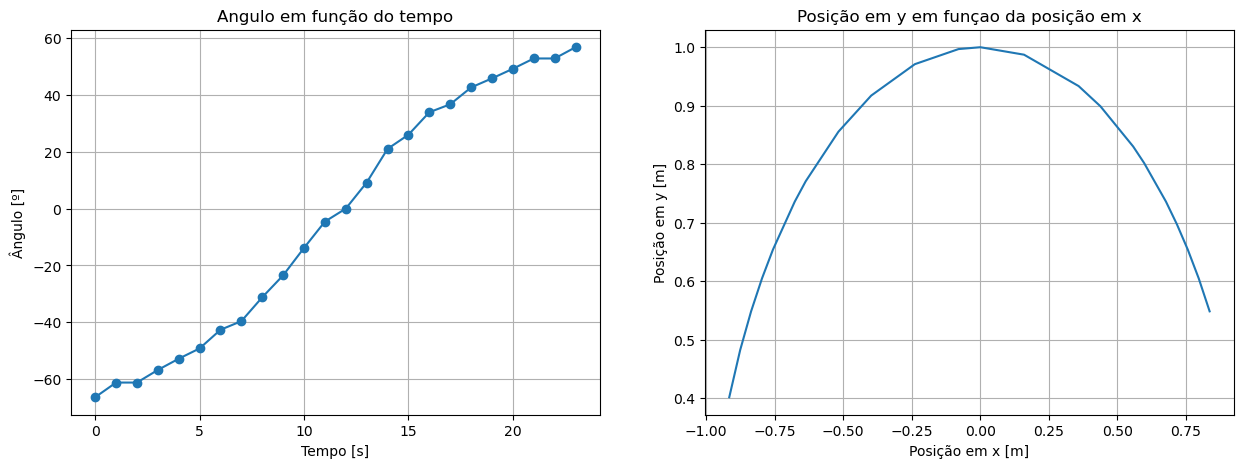

In [3]:
#dividir por multiplos de 1024
d = 0.18
c = 344

distancia = 1

posx = []
posy = []
   
fs, data = wavfile.read("./in/fonte_mov.wav")

print('Frequência de Amostragem:', fs,'Hz')
print('Número de amostras:', len(data),'samples')

tempo = len(data)/fs

print('Tempo do ficheiro:', round(tempo, 2),'s')
print()

left_ear = data[:,0]
right_ear = data[:,1]

left_channel = left_ear.astype('int64')
right_channel = right_ear.astype('int64')

angulos = []
amostras = 24
# Range de 24 pois temos 24 periodos de amostras, cortando 0.83s de amostras
for i in range(amostras):
    
    delta_t = signal.correlate(left_channel[i*48000:(i+1)*48000],right_channel[i*48000:(i+1)*48000],mode='full')
    
    atraso = np.argmax(delta_t)-len(left_channel[i*48000:(i+1)*48000])
    
    if atraso > 25:
        atraso = atraso - 25
        theta = (np.arcsin(atraso/fs * c / d)/np.pi*180) + 90
        
    elif atraso < -25:
        atraso = atraso + 25
        theta = (np.arcsin(atraso/fs * c / d)/np.pi*180) - 90
        
    else:
        theta = np.arcsin(atraso/fs * c / d)/np.pi*180
        
    #print('Angulo da amostra ' + str(i) + ': ' + str(round(theta,2))) 
    angulos.append(theta)
    
    posx.append(np.cos(math.radians(theta)))
    posy.append(np.sin(math.radians(theta)))

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
ax1.set_title("Angulo em função do tempo")
ax1.set_xlabel("Tempo [s]")
ax1.set_ylabel("Ângulo [º]")
ax1.plot(angulos, '-o')
ax1.grid()

ax2.set_title("Posição em y em funçao da posição em x")
ax2.set_xlabel("Posição em x [m]")
ax2.set_ylabel("Posição em y [m]")
ax2.plot(posy, posx)
ax2.grid()

<u>Nota:</u> No segundo gráfico onde é mostrada as posições (x,y) , o ouvinte está no ponto (0,0), e a distnância está em metros. Foi considerado um periodo de 24 amostras, ou seja, 48000 * 24 < numero total de amostras. Ou seja, estamos a desperciçar 0.83 s do sinal.


## Questão 2 – Sinal sonoro em um ponto (audição monaural) no plano horizontal, com sala

1. Utilizando o modelo apresentado na figura, sintetize o sinal sonoro na saída, (guarde em ficheiro
WAVE), para as seguintes situações:

a. Campo direto

In [59]:
#tempo que o som demora a chegar a nós, adicionar zeros no inicio do array

d = 400 #metros de distância !!! ALTERAR ESTE VALOR PARA OBTER RESULTADOS DIFERENTES
c = 344

#regra 3 simples
tempo = d/c

samplerate2, data2 = wavfile.read("./in/07_LeadVox.wav")

left_channel2 = data2[0::2]
left_channel2 = left_channel2[:-1]
right_channel2 = data2[1::2]

left_channel2 = left_channel2.astype('int64')
right_channel2 = right_channel2.astype('int64')

n_amostras = tempo*samplerate2

amostras = np.zeros(math.floor(n_amostras))
print("Numero de zeros a adicionar: ",len(amostras))

new_left2 = np.insert(left_channel2,   0, amostras)
new_right2 = np.insert(right_channel2, 0, amostras)

newData2 = np.zeros(len(data2)+2*len(amostras)-1)
newData2[0::2] = new_left2/np.max(np.abs(new_left2))*2**15 #metemos o valor de -1 a 1 dividindo pelo maximo, e 
newData2[1::2] = new_right2/np.max(np.abs(new_right2))*2**15 #multiplicamos por 2**15 para tar entre -2**15 e 2**15
newData2 = newData2.astype('int16')

wavfile.write("./out/ex_2_campo_direto.wav",samplerate2,newData2.astype(np.int16))
print("Numero de segundos de atraso: ", len(amostras)/samplerate2)


Numero de zeros a adicionar:  51279
Numero de segundos de atraso:  1.1627891156462584


b. Campo Reverberante para os seguintes valores de RT60: 0s, 0.5s, 2s e 10s.

In [60]:
Fs = samplerate2
n = np.arange(0,2*Fs)
RT60 = [0.5,2,10]
for i in RT60:
    print("A gerar para RT60: " + str(i))
    C = 3*np.log(10/i)
    beta = np.random.randn(len(n))
    hreverb = beta * np.exp(-C/Fs*n)
    
    lchannel2 = np.convolve(hreverb,data2)
    rchannel2 = np.convolve(hreverb,data2)
    newData2 = np.zeros((len(lchannel2),2))
    newData2[:,0] = lchannel2/np.max(np.abs(lchannel2))*2**15 #metemos o valor de -1 a 1 dividindo pelo maximo, e 
    newData2[:,1] = rchannel2/np.max(np.abs(rchannel2))*2**15 #multiplicamos por 2**15 para tar entre -2**15 e 2**15
    newData2.astype('int16')
    
    path_out = "./out/ex_2_RT60_" + str(i) + ".wav"

    wavfile.write(path_out,samplerate2,newData2.astype(np.int16))
    
print("Finish!")

A gerar para RT60: 0.5
A gerar para RT60: 2
A gerar para RT60: 10
Finish!


c. Campo total = Campo direto + Campo Reverberante

In [61]:
samplerate2c1, data2c1 = wavfile.read("./out/ex_2_campo_direto.wav")
samplerate2c2, data2c2 = wavfile.read("./out/ex_2_RT60_0.5.wav")

print(len(data2c1))
print(len(data2c2))


print("data2c1 len: ",len(data2c1))
print()
print("data2c2 len: ",len(data2c2))
print()
print("data2c1: ", data2c1)
print()
print("data2c2: ", data2c2)
print()

left_channel2c1 = data2c1[0::2]
#print("left channel 2c1: ",left_channel2c1)
print()
print("left channel 2c1 len: ", len(left_channel2c1))
print()
right_channel2c1 = data2c1[1::2]
#print("right channel 2c1: ", right_channel2c1)
print()
print("right channel 2c1 len: ", len(right_channel2c1))
print()

left_channel2c2 = data2c2[:,0]
#print("left channel 2c2: ", left_channel2c2)
print()
print("left channel 2c2 len: ", len(left_channel2c2))
print()
right_channel2c2 = data2c2[:,1]
#print("right channel 2c2: ", right_channel2c2)
print()
print("right channel 2c2 len: ", len(right_channel2c2))
print()


wavfile.write("./out/ex_2_campo_direto_mais_RT60_0.5",samplerate2c1,newData2c.astype(np.int16))


838302
823944
data2c1 len:  838302

data2c2 len:  823944

data2c1:  [0 0 0 ... 0 0 0]

data2c2:  [[0 0]
 [2 2]
 [8 8]
 ...
 [0 0]
 [0 0]
 [0 0]]


left channel 2c1 len:  419151


right channel 2c1 len:  419151


left channel 2c2 len:  823944


right channel 2c2 len:  823944



NameError: name 'newData2c' is not defined

## Questão 3 – Sinal sonoro no ouvinte (audição binaural) no plano horizontal, com sala

1. Utilizando sinais de áudio, queremos simular o ouvinte no interior da orquestra, com os
instrumentos musicais à sua volta. Apresente o sinal binaural (guarde em ficheiro WAVE) para
as seguintes situações:

a. Dois ouvidos afastados entre si de 18 cm, com e sem a forma da cabeça utilizando o ITD;

In [40]:
voxrate, voxdata = wavfile.read("./in/07_LeadVox.wav")


d = 0.18
c = 344
fs = voxrate
nsamples = len(voxdata)
max_angle = np.pi/2

samples = d*np.sin(np.pi/2)/c
samples = samples * fs

# Tendo em conta a frequência de amostragem, o atraso pode ser no máximo de 23 amostras

print('Dimensão dos arrays: ' + str(nsamples))
print('Atraso de amostras para ângulo máximo de 90º: ' + str(round(samples)))

at13 = np.zeros(13)
at18 = np.zeros(18)
at2  = np.zeros(2)
at8  = np.zeros(8)
at5  = np.zeros(5)

sounds = ['01_Kick_dual_mono','02_Snare_dual_mono','03_Overheads_dual_mono',
          '04_Percussion_dual_mono','05_Bass_dual_mono','06_Gtr_dual_mono','07_LeadVox_dual_mono']

for i in sounds:
    
    fs, data = wavfile.read("./in/" + i + ".wav")
    
    #Por alguma razão estes ficheiros estavam em mono e o formato que ficava no final depois de corrigirmos isto
    #dava imensos problemas. Mas foi possível corrigir. Duplicamos os canais no audacity ao invés de fazermos
    #no python e o formato ficou com a shape correta para poder ser guardado pelo wavfile.write
    #Não percebemos se os ficheiros estarem em mono era algo intencional pois outros ficheiros .wav
    #são fornecidos em stereo mas resolvemos esse problema de qualquer maneira
    
    left  = data[:,0]
    right = data[:,1]
    
    left  = left.astype('int64')
    right = right.astype('int64')
    
    left = np.array(left)
    right = np.array(right)
    
    #Sempre que verificar o nome de cada um dos ficheiros, adicionamos um valor de zeros ao início do array
    #e retiramos o mesmo valor no final desse array
    
    if i == '01_Kick_dual_mono':
        
        
        left = np.hstack((at13,left))
        left = np.delete(left, [nsamples-13,nsamples-12,nsamples-11,nsamples-10,nsamples-9,
                                nsamples-8,nsamples-7,nsamples-6,nsamples-5,nsamples-4,
                                nsamples-3,nsamples-2,nsamples-1])
        
        kick_left = left
        kick_right = right
    
    elif i == '02_Snare_dual_mono':
        
        left = np.hstack((at13,left))
        left = np.delete(left, [nsamples-13,nsamples-12,nsamples-11,nsamples-10,nsamples-9,
                                nsamples-8,nsamples-7,nsamples-6,nsamples-5,nsamples-4,
                                nsamples-3,nsamples-2,nsamples-1])
        
        snare_left = left
        snare_right = right
    
    elif i == '03_Overheads_dual_mono':
        
        right = np.hstack((at18,right))
        right = np.delete(right, [nsamples-18,nsamples-17,nsamples-16,nsamples-15,
                                  nsamples-14,nsamples-13,nsamples-12,nsamples-11,nsamples-10,
                                  nsamples-9,nsamples-8,nsamples-7,nsamples-6,nsamples-5,nsamples-4,
                                  nsamples-3,nsamples-2,nsamples-1])
        
        overheads_left = left
        overheads_right = right
    
    elif i == '04_Percussion_dual_mono':
        
        right = np.hstack((at5,right))
        right = np.delete(right, [nsamples-5,nsamples-4,nsamples-3,nsamples-2,nsamples-1])
        
        percussion_left = left
        percussion_right = right
        
    elif i == '05_Bass_dual_mono':
        
        left = np.hstack((at8,left))
        left = np.delete(left, [nsamples-8,nsamples-7,nsamples-6,nsamples-5,nsamples-4,
                                nsamples-3,nsamples-2,nsamples-1])
        
        bass_left = left
        bass_right = right
        
    elif i == '06_Gtr_dual_mono':
        
        right = np.hstack((at13,right))
        right = np.delete(right, [nsamples-13,nsamples-12,nsamples-11,nsamples-10,
                                nsamples-9,nsamples-8,nsamples-7,nsamples-6,nsamples-5,nsamples-4,
                                nsamples-3,nsamples-2,nsamples-1])
        
        gtr_left = left
        gtr_right = right
    
    elif i == '07_LeadVox_dual_mono':
        
        leadvox_left = left
        leadvox_right = right
    
    # Por alguma razão tanto o np.correlate como o sp.correlate estão absurdamente lentos
    # No exercício 1 o sp.correlate foi bastante rápido. A música tinha a duração de 9s e
    # calculou o correlate quase instantâneamente 6 vezes enquanto que aqui demora imenso
    # para calcular para uma música com duração de 16s
    
    #delta = np.correlate(left,right,mode='full')
    #atraso = np.argmax(delta)-len(left)
    #theta = np.arcsin(atraso/fs * c / d)/np.pi*180
    #print("Angulo do " + str(i) + ": " +  str(theta))
    
#Somamos todos os arrays correspondentes a cada ouvido e guardamos numa variável    

song_left = kick_left + snare_left + overheads_left + percussion_left + bass_left + gtr_left + leadvox_left
song_right = kick_right + snare_right + overheads_right + percussion_right + bass_right + gtr_right + leadvox_right

newData = np.zeros((len(song_left),2))
newData[:,0] = song_left/np.max(np.abs(song_left))*2**15 #metemos o valor de -1 a 1 dividindo pelo maximo, e 
newData[:,1] = song_right/np.max(np.abs(song_right))*2**15 #multiplicamos por 2**15 para tar entre -2**15 e 2**15

wavfile.write("./out/ex_3_a.wav",fs,newData.astype(np.int16))

Dimensão dos arrays: 735745
Atraso de amostras para ângulo máximo de 90º: 23


b. Utilizando as funções HRTF

In [58]:
#A única diferença do código desta célula para a anterior será que o convolve será utilizado ao invés da inserção
#e remoção manual de samples

folder = "./compact/elev0/"

voxrate, voxdata = wavfile.read("./in/07_LeadVox.wav")

d = 0.18
c = 344
fs = voxrate
nsamples = len(voxdata)
max_angle = np.pi/2

samples = d*np.sin(np.pi/2)/c
samples = samples * fs

# Tendo em conta a frequência de amostragem, o atraso pode ser no máximo de 23 amostras

print('Atraso de amostras para ângulo máximo de 90º: ' + str(round(samples)))
print()

sounds = ['01_Kick_dual_mono','02_Snare_dual_mono','03_Overheads_dual_mono',
          '04_Percussion_dual_mono','05_Bass_dual_mono','06_Gtr_dual_mono','07_LeadVox_dual_mono']

for i in sounds:
    
    fs, data = wavfile.read("./in/" + i + ".wav")
    
    data = data.astype('float')
    
    #print("Print data: ", data)
    
    left  = data[:,0]
    right = data[:,1]
    #print("Print right: ", right)
    
    left  = left.astype('int64')
    right = right.astype('int64')
    
    left = np.array(left)
    right = np.array(right)
    
    if i == '01_Kick_dual_mono':
        
        numpy_data = np.fromfile(folder +'H0e020a.dat', dtype='short')
        leftimp = numpy_data[0::2]
        rightimp = numpy_data[1::2]
        
        kick_left = np.convolve(leftimp,left)
        kick_right = np.convolve(rightimp,right)
        
        #print(kick_left)
    
    elif i == '02_Snare_dual_mono':
        
        numpy_data = np.fromfile(folder +'H0e030a.dat', dtype='short')
        leftimp = numpy_data[0::2]
        rightimp = numpy_data[1::2]
        
        snare_left = np.convolve(rightimp,left)
        snare_right = np.convolve(leftimp,right)
        
    elif i == '03_Overheads_dual_mono':
        
        numpy_data = np.fromfile(folder +'H0e030a.dat', dtype='short')
        leftimp = numpy_data[0::2]
        rightimp = numpy_data[1::2]
        
        overheads_left = np.convolve(rightimp,left)
        overheads_right = np.convolve(leftimp,right)
    
    elif i == '04_Percussion_dual_mono':
        
        numpy_data = np.fromfile(folder +'H0e040a.dat', dtype='short')
        leftimp = numpy_data[0::2]
        rightimp = numpy_data[1::2]
        
        percussion_left = np.convolve(rightimp,left)
        percussion_right = np.convolve(leftimp,right)
 
    elif i == '05_Bass_dual_mono':
        
        numpy_data = np.fromfile(folder +'H0e040a.dat', dtype='short')
        leftimp = numpy_data[0::2]
        rightimp = numpy_data[1::2]
        
        bass_left = np.convolve(leftimp,left)
        bass_right = np.convolve(rightimp,right)
        
    elif i == '06_Gtr_dual_mono':
        
        numpy_data = np.fromfile(folder +'H0e050a.dat', dtype='short')
        leftimp = numpy_data[0::2]
        rightimp = numpy_data[1::2]
        
        gtr_left = np.convolve(rightimp,left)
        gtr_right = np.convolve(leftimp,right)

    
    elif i == '07_LeadVox_dual_mono':
        
        numpy_data = np.fromfile(folder +'H0e080a.dat', dtype='short')
        leftimp = numpy_data[0::2]
        rightimp = numpy_data[1::2]
        
        leadvox_left = np.convolve(leftimp,left)
        leadvox_right = np.convolve(rightimp,right)
        
    
    # Por alguma razão tanto o np.correlate como o sp.correlate estão absurdamente lentos
    # No exercício 1 o sp.correlate foi bastante rápido. A música tinha a duração de 9s e
    # calculou o correlate quase instantâneamente 6 vezes enquanto que aqui demora imenso
    # para calcular para uma música com duração de 16s
    
    #delta = np.correlate(left,right,mode='full')
    #atraso = np.argmax(delta)-len(left)
    #theta = np.arcsin(atraso/fs * c / d)/np.pi*180
    #print("Angulo do " + str(i) + ": " +  str(theta))
    
song_left = kick_left + snare_left + overheads_left + percussion_left + bass_left + gtr_left + leadvox_left
song_right = kick_right + snare_right + overheads_right + percussion_right + bass_right + gtr_right + leadvox_right

newData = np.zeros((len(song_left),2))
newData[:,0] = song_left/np.max(np.abs(song_left))*2**15 - 1 #metemos o valor de -1 a 1 dividindo pelo maximo, e 
newData[:,1] = song_right/np.max(np.abs(song_right))*2**15 - 1 #multiplicamos por 2**15 para tar entre -2**15 e 2**15

wavfile.write("./out/ex_3_b.wav",fs,newData.astype(np.int16))

Atraso de amostras para ângulo máximo de 90º: 23



c. Resolva a alínea anterior com Campo Reverberante para os seguintes valores de RT60:
0s, 0.5s, 2s e 10s.

In [64]:
#no resultado da soma adicionamos o campo reverbrante

new_left = newData[:,0]
new_right = newData[:,1]

Fs = voxrate
n = np.arange(0,2*Fs)
RT60 = [0.5,2,10]
for i in RT60:
    print("A gerar para RT60: " + str(i))
    C = 3*np.log(10/i)
    beta = np.random.randn(len(n))
    hreverb = beta * np.exp(-C/Fs*n)
    
    lchannel = np.convolve(hreverb,new_left)
    rchannel = np.convolve(hreverb,new_right)
    newData2 = np.zeros((len(lchannel),2))
    newData2[:,0] = lchannel/np.max(np.abs(lchannel))*2**15 #metemos o valor de -1 a 1 dividindo pelo maximo, e 
    newData2[:,1] = rchannel/np.max(np.abs(rchannel))*2**15 #multiplicamos por 2**15 para tar entre -2**15 e 2**15
    newData2.astype('int16')
    
    path_out = "./out/ex_3_RT60_" + str(i) + ".wav"

    wavfile.write(path_out,samplerate2,newData2.astype(np.int16))
    
print("Finish!")

A gerar para RT60: 0.5
A gerar para RT60: 2
A gerar para RT60: 10
Finish!


## Questão 4 – Sinal sonoro em audição binaural no plano horizontal com ouvinte em movimento de rotação, sem sala

1. Considere que o ouvinte roda em torno de si próprio (cadeira de escritório rotativa), com uma
velocidade angular constante. Implemente um script que gere uma audição binaural, utilizando as
funções HRTF (guarde em ficheiro WAVE).

In [5]:
#Uma célula com uma função ADSR feita por um dos elementos do grupo no semestre passado em PDS
#É uma função útil para remover um pouco do popping que existe na música

def ADSR(fs, size):
    
    Amax = 1
    Adecay = 0.65
    
    attackTime = int(fs * 0.01)
    attack = np.linspace(0, Amax, attackTime)

    decayTime = int(fs * 0.005)
    decay = np.linspace(Amax, Adecay, decayTime)

    releaseTime = int(fs * 0.02)
    release = np.linspace(Adecay, 0, releaseTime)

    sustainTime = int(size - attackTime - decayTime - releaseTime)
    sustain = np.ones(sustainTime) * Adecay

    envelope = np.hstack((attack, decay, sustain, release))

    return envelope

In [41]:
folder = "./compact/elev0_special/"
fs, data = wavfile.read("./in/07_LeadVox.wav")

d = 0.18
c = 344
nsamples = len(data)
max_angle = np.pi/2

samples = d*np.sin(np.pi/2)/c
samples = samples * fs

#Variáveis com propósito de print tirando shift e voltas

rotacao = nsamples/5
shift = int(rotacao/14)
rotacao2 = 36*shift
voltas = round(nsamples/rotacao2,1)
vezes = nsamples//shift

print('Dimensão dos arrays: ' + str(nsamples))
print('Atraso de amostras para ângulo máximo de 90º: ' + str(round(samples)))
print('Uma rotação equivale a ' + str(round(rotacao2)) + ' samples, ou seja, ' + str(voltas) + ' voltas')
print('Cada mudança de ângulo equivale a ' + str(round(shift)) + ' samples')
print('O processo de mudança de ângulo será feito ' + str(vezes) + ' vezes')

data  = data.astype('float')
skipName = 0
aux = 0

song_left_done = np.array([])
song_right_done = np.array([])

for aux in range(vezes):

    numpy_data = np.fromfile(folder +'H0e' + str(round(skipName)) + 'a.dat', dtype='short')
    leftimp = numpy_data[0::2]
    rightimp = numpy_data[1::2]
    
    dataSlice = data[shift*aux:shift*(aux+1)]

    Ldatanormal = np.convolve(leftimp, dataSlice)
    Rdatanormal = np.convolve(rightimp,dataSlice)
    Ldatainverted = np.convolve(rightimp,dataSlice)
    Rdatainverted = np.convolve(leftimp,dataSlice)
    
    
    #A cada 18 arrays guardados na variável song_left/song_right em datanormal, o valor inverte
    #Esta inversão trata-se da passagem de 180º para 190º. No entanto, como os ficheiros da hrtf
    #vão até 180º, dos 180º até 360º invertemos os canais com o propósito de manter a "rotação"
    #uniforme
    
    #Este valor "18" trata-se apenas duma maneira conveniente de saltarmos de 10 em 10 gr
    
    if aux == 0 or (aux - 1)//18%2 == 0:
        
        song_left  = Ldatanormal
        song_right = Rdatanormal
    
    else:
        
        song_left  = Ldatainverted
        song_right = Rdatainverted
    

    #Utilizamos esta condição para podermos chegar ao ficheiro e fazer 160->170->180->170->160
    #Onde o decrescer será quando guardamos os valores invertidos para simular a rotação
    
    skipName += 10 if aux//18%2 == 0 else -10
    
    song_left_done = np.hstack((song_left_done,song_left*ADSR(fs,len(song_left))))
    song_right_done = np.hstack((song_right_done,song_right*ADSR(fs,len(song_right))))

newData = np.zeros((len(song_left_done),2))
newData[:,0] = song_left_done/np.max(np.abs(song_left_done))*2**15 - 1 #metemos o valor de -1 a 1 dividindo pelo maximo, e 
newData[:,1] = song_right_done/np.max(np.abs(song_right_done))*2**15 - 1 #multiplicamos por 2**15 para tar entre -2**15 e 2**15

wavfile.write("./out/ex_4.wav",fs,newData.astype(np.int16))
print('Done!')

Dimensão dos arrays: 735745
Atraso de amostras para ângulo máximo de 90º: 23
Uma rotação equivale a 378360 samples, ou seja, 1.9 voltas
Cada mudança de ângulo equivale a 10510 samples
O processo de mudança de ângulo será feito 70 vezes
Done!


## Questão 5 – Transmissão do sinal binaural através do sistema de telecomunicações desenvolvido nos trabalhos anteriores.
1. Pretende enviar-se o sinal sintetizado na Questão 3c pelo sistema de telecomunicações.